In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [100]:
df_train = pd.read_csv('datos.csv') #Leemos base de datos

x_train = df_train['X'].values.reshape(-1, 1) #Eje x
y_train = df_train['Y'].values.reshape(-1, 1) #Eje y

#Normalizamos
scaler_x = StandardScaler()
scaler_y = StandardScaler()

#Las redes trabajan mejor con valores normalizados
x_train_normalized = scaler_x.fit_transform(x_train)
y_train_normalized = scaler_y.fit_transform(y_train)

#Perceptrón
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

#Entrenamos
history = model.fit(x_train_normalized, y_train_normalized, epochs=100, verbose=1)

#Predecimos
predicted_y_normalized = model.predict(x_train_normalized)

#Quitamos la normalización
predicted_y = scaler_y.inverse_transform(predicted_y_normalized)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.4534
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9902
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6838
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4814
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.3490
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2609
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1997
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1589
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1329
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1145
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1026
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0941
Epoch 13/100
10/10 [================

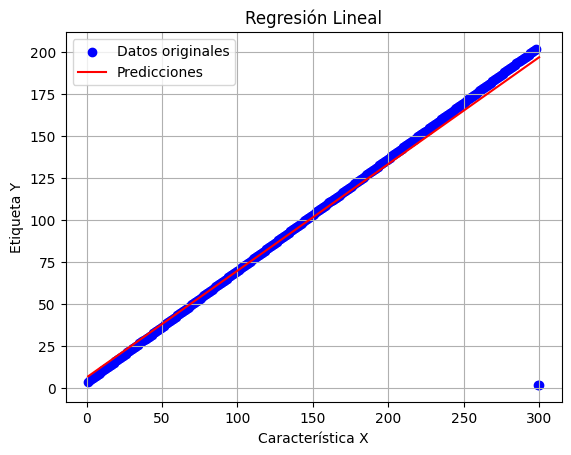

In [102]:
#Gráficamos
plt.scatter(x_train, y_train, label='Datos originales', color='blue')
plt.plot(x_train, predicted_y, label='Predicciones', color='red')
plt.xlabel('Característica X')
plt.ylabel('Etiqueta Y')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()